# How do I translate a datetime into a filename?

In [1]:
import iris
import os
import xarray as xr
import numpy as np

import copy

import crd_utils as crd

In [2]:
filepath_1h = '/data/cssp-china/mini-dataset-24-01-19/20CR/hourly/'
files_1h = sorted(os.listdir(filepath_1h))
files_1h[1]

'apepda.pj511f0.pp'

In [3]:
filepath_6h = '/data/cssp-china/mini-dataset-24-01-19/20CR/6hrly/'
files_6h = sorted(os.listdir(filepath_6h))
files_6h[1]

'apepda.pb511f0.pp'

In [4]:
filepath_3h = '/data/cssp-china/mini-dataset-24-01-19/20CR/3hrly/'
files_3h = sorted(os.listdir(filepath_3h))
files_3h[1]

'apepda.pc511f0.pp'

In [5]:
filepath_d = '/data/cssp-china/mini-dataset-24-01-19/20CR/daily'
files_d = sorted(os.listdir(filepath_d))
files_d[1]
# cubelist_d = crd.file_to_cubelist(files_d[1], filepath_d)
# print(f'Number of cubes: {len(cubelist_d)}')

'apepda.pa511f0.pp'

In [6]:
filepath_m = '/data/cssp-china/mini-dataset-24-01-19/20CR/monthly/'
files_m = sorted(os.listdir(filepath_m))
files_m[1]

'apepda.pm51aug.pp'

In [7]:
os.listdir('/data/cssp-china/mini-dataset-24-01-19/20CR')

['6hrly',
 '3hrly',
 'variableslist.pdf',
 'monthly',
 'hourly',
 'daily',
 '.ipynb_checkpoints']

In [8]:
import umdates_utils as um

In [104]:
from datetime import datetime, timedelta

In [36]:
runid = 'apepd'
startd = datetime(1851, 1, 5)
endd = datetime(2011, 1, 9)
freq = 'pa'

theory_fnames = um.UMFileList(runid, startd, endd, freq)

In [37]:
theory_fnames[0:10]

['apepda.pa51150.pp',
 'apepda.pa511f0.pp',
 'apepda.pa511p0.pp',
 'apepda.pa51240.pp',
 'apepda.pa512e0.pp',
 'apepda.pa512o0.pp',
 'apepda.pa51360.pp',
 'apepda.pa513g0.pp',
 'apepda.pa513q0.pp',
 'apepda.pa51450.pp']

In [38]:
len(theory_fnames)

5845

In [39]:
len(files_d)

5850

In [40]:
def umstamp_from_filename(filename):
    parts = filename.split('.')
    return parts[1][2:]

In [41]:
print(um.convertFromUMStamp(umstamp_from_filename(files_d[0]), 'YYMDH'))
print(um.convertFromUMStamp(umstamp_from_filename(theory_fnames[0]), 'YYMDH'))
print(um.convertFromUMStamp(umstamp_from_filename(files_d[-1]), 'YYMDH'))
print(um.convertFromUMStamp(umstamp_from_filename(theory_fnames[-1]), 'YYMDH'))

1851-01-05 00:00:00
1851-01-05 00:00:00
2011-01-05 00:00:00
2011-01-06 00:00:00


In [16]:
for file in files_m[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMMM')
    print(f'{dt}    {file}')

1851-04-01 00:00:00    apepda.pm51apr.pp
1851-08-01 00:00:00    apepda.pm51aug.pp
1851-12-01 00:00:00    apepda.pm51dec.pp
1851-02-01 00:00:00    apepda.pm51feb.pp
1851-01-01 00:00:00    apepda.pm51jan.pp
1851-07-01 00:00:00    apepda.pm51jul.pp
1851-06-01 00:00:00    apepda.pm51jun.pp
1851-03-01 00:00:00    apepda.pm51mar.pp
1851-05-01 00:00:00    apepda.pm51may.pp
1851-11-01 00:00:00    apepda.pm51nov.pp


In [17]:
for file in files_d[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH')
    print(f'{dt}    {file}')

1851-01-05 00:00:00    apepda.pa51150.pp
1851-01-15 00:00:00    apepda.pa511f0.pp
1851-01-25 00:00:00    apepda.pa511p0.pp
1851-02-04 00:00:00    apepda.pa51240.pp
1851-02-14 00:00:00    apepda.pa512e0.pp
1851-02-24 00:00:00    apepda.pa512o0.pp
1851-03-06 00:00:00    apepda.pa51360.pp
1851-03-16 00:00:00    apepda.pa513g0.pp
1851-03-26 00:00:00    apepda.pa513q0.pp
1851-04-05 00:00:00    apepda.pa51450.pp


In [18]:
for file in files_6h[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH')
    print(f'{dt}    {file}')

1851-01-05 00:00:00    apepda.pb51150.pp
1851-01-15 00:00:00    apepda.pb511f0.pp
1851-01-25 00:00:00    apepda.pb511p0.pp
1851-02-04 00:00:00    apepda.pb51240.pp
1851-02-14 00:00:00    apepda.pb512e0.pp
1851-02-24 00:00:00    apepda.pb512o0.pp
1851-03-06 00:00:00    apepda.pb51360.pp
1851-03-16 00:00:00    apepda.pb513g0.pp
1851-03-26 00:00:00    apepda.pb513q0.pp
1851-04-05 00:00:00    apepda.pb51450.pp


In [19]:
for file in files_3h[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH')
    print(f'{dt}    {file}')

1851-01-05 00:00:00    apepda.pc51150.pp
1851-01-15 00:00:00    apepda.pc511f0.pp
1851-01-25 00:00:00    apepda.pc511p0.pp
1851-02-04 00:00:00    apepda.pc51240.pp
1851-02-14 00:00:00    apepda.pc512e0.pp
1851-02-24 00:00:00    apepda.pc512o0.pp
1851-03-06 00:00:00    apepda.pc51360.pp
1851-03-16 00:00:00    apepda.pc513g0.pp
1851-03-26 00:00:00    apepda.pc513q0.pp
1851-04-05 00:00:00    apepda.pc51450.pp


In [20]:
for file in files_1h[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH')
    print(f'{dt}    {file}')

1851-01-05 00:00:00    apepda.pj51150.pp
1851-01-15 00:00:00    apepda.pj511f0.pp
1851-01-25 00:00:00    apepda.pj511p0.pp
1851-02-04 00:00:00    apepda.pj51240.pp
1851-02-14 00:00:00    apepda.pj512e0.pp
1851-02-24 00:00:00    apepda.pj512o0.pp
1851-03-06 00:00:00    apepda.pj51360.pp
1851-03-16 00:00:00    apepda.pj513g0.pp
1851-03-26 00:00:00    apepda.pj513q0.pp
1851-04-05 00:00:00    apepda.pj51450.pp


In [42]:
for file in theory_fnames[0:10]:
    dt = um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH')
    print(f'{dt}    {file}')

1851-01-05 00:00:00    apepda.pa51150.pp
1851-01-15 00:00:00    apepda.pa511f0.pp
1851-01-25 00:00:00    apepda.pa511p0.pp
1851-02-04 00:00:00    apepda.pa51240.pp
1851-02-14 00:00:00    apepda.pa512e0.pp
1851-02-24 00:00:00    apepda.pa512o0.pp
1851-03-06 00:00:00    apepda.pa51360.pp
1851-03-16 00:00:00    apepda.pa513g0.pp
1851-03-26 00:00:00    apepda.pa513q0.pp
1851-04-05 00:00:00    apepda.pa51450.pp


In [43]:
check = np.array(theory_fnames==)

5845

In [66]:
check = np.array(files_d[0:5840])==np.array(theory_fnames[0:5840])
check

array([ True,  True,  True, ..., False, False, False])

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
file_dates = np.array([um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH') for file in files_d])
file_dates

array([datetime.datetime(1851, 1, 5, 0, 0),
       datetime.datetime(1851, 1, 15, 0, 0),
       datetime.datetime(1851, 1, 25, 0, 0), ...,
       datetime.datetime(2010, 12, 16, 0, 0),
       datetime.datetime(2010, 12, 26, 0, 0),
       datetime.datetime(2011, 1, 5, 0, 0)], dtype=object)

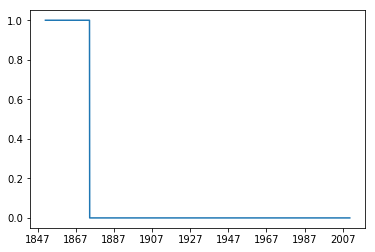

In [69]:
plt.plot(file_dates[:5840], check)

In [70]:
timedeltas = file_dates[1:]-file_dates[0:-1]
timedeltas

array([datetime.timedelta(10), datetime.timedelta(10),
       datetime.timedelta(10), ..., datetime.timedelta(10),
       datetime.timedelta(10), datetime.timedelta(10)], dtype=object)

In [85]:
td = np.array([td.days for td in timedeltas])
td

array([10, 10, 10, ..., 10, 10, 10])

In [120]:
def umstamp_from_filename(filename):
    parts = filename.split('.')
    return parts[1][2:]

def filenames_to_datetimes(filenames):
    datetimes = [um.convertFromUMStamp(umstamp_from_filename(file), 'YYMDH') for file in filenames]
    return np.array(datetimes)
    
def datetimes_to_timedeltas(datetimes):
    return file_dates[1:]-file_dates[0:-1]
    
def timedeltas_to_days(timedeltas):
    return np.array([td.days for td in timedeltas])

def plot_td_hist(td, frequency='Daily'):
    plt.hist(td, bins=np.arange(2.5, 30.5), log=True)
    plt.gcf().set_size_inches(15, 5)
    plt.xticks(np.arange(2, 31))
    plt.xlabel('Days')
    plt.ylabel('Number of timedeltas')
    plt.title(f'Distribution of times between filenames: {frequency}')
    plt.show()

def freq_hist_plot(filenames, frequency='Daily'):
    dtimes = filenames_to_datetimes(filenames)
    td = timedeltas_to_days(datetimes_to_timedeltas(dtimes))
    plot_td_hist(td, frequency=frequency)

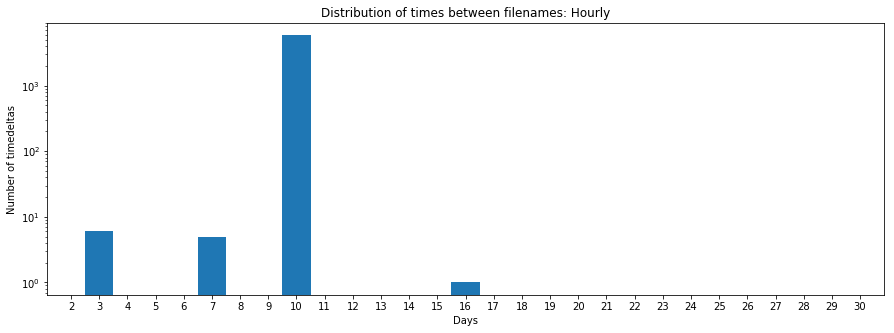

In [121]:
freq_hist_plot(files_1h, 'Hourly')

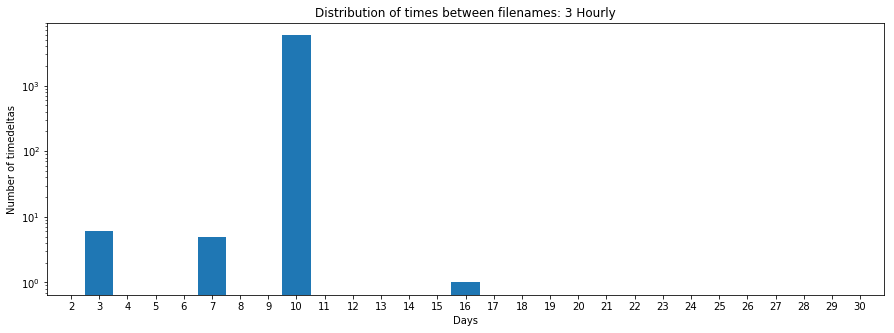

In [122]:
freq_hist_plot(files_3h, '3 Hourly')

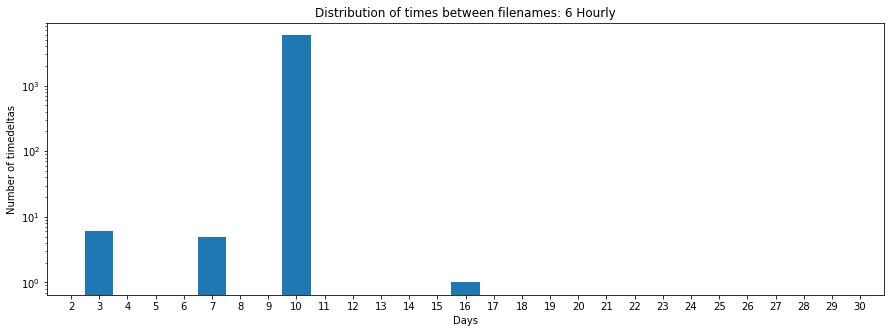

In [123]:
freq_hist_plot(files_6h, '6 Hourly')

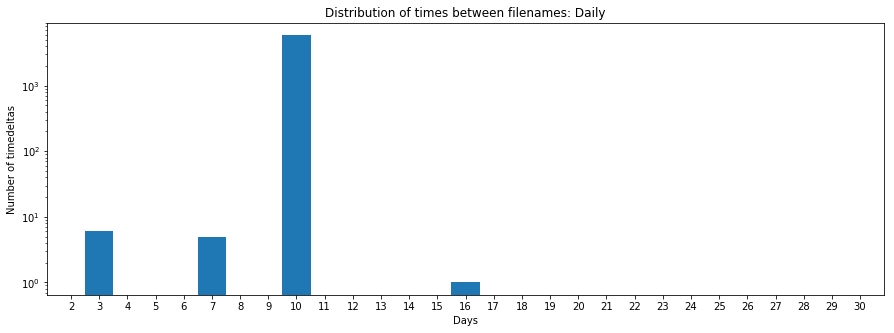

In [124]:
freq_hist_plot(files_d, 'Daily')

In [ ]:
# freq_hist_plot(files_m, 'Hourly')